In [18]:
import pandas as pd
import numpy as np
from random import choice
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from Classes.PCA import PCA
from Classes.KNumNeighborsClassifier import KNumNeighborsClassifier
from Classes.KNumNeighborsTeacher import KNumNeighborsTeacher
from Classes.KMeanClastinatorTrain import KMeanClastinatorTrain
from Functions.functions_of_priority import max_count_class
from Functions.distance_functions import euclid_distance

from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE



In [19]:
def random_center(x, k):
    return np.array([choice(x) for _ in range(k)])
def standart_mass_center_searcher(a):
    return sum(a)/a.shape[0]


In [20]:
data = pd.read_csv('../Data/DataLaba2/neo_task_smoted.csv').dropna()
mm_scaler = MinMaxScaler()
data_scaled = mm_scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)
data_scaled_x, hazardous = SMOTE().fit_resample(data_scaled.drop(['hazardous'], axis=1), data['hazardous'])


In [21]:
x1 = PCA(covariance_counter=lambda x: np.cov(x, rowvar=False), eigen_searcher=lambda x: eigh(x)).get_first_n(data_scaled_x.to_numpy(), 2)

In [22]:
cl = KMeanClastinatorTrain(centers_of_mass=random_center(x1, 2),
                           k_neighbors=5,
                           metric=euclid_distance,
                           mass_center_searcher=standart_mass_center_searcher,
                           function_of_priority=max_count_class,
                           n_steps=10)
clastinator1 = cl.train(x1)


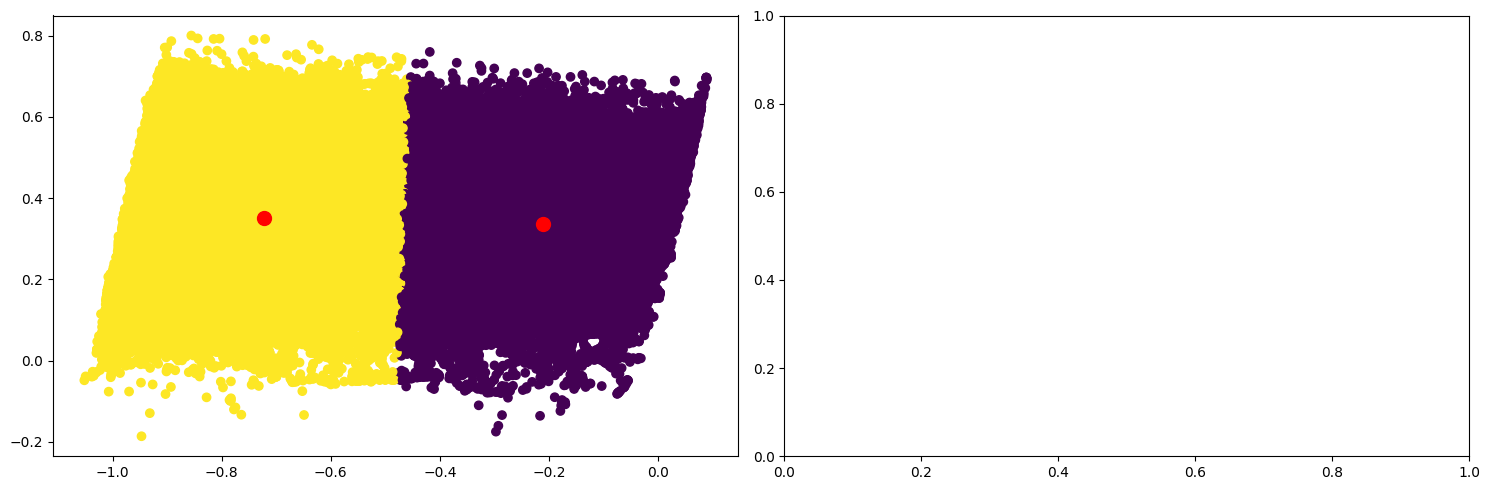

In [23]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(5)
fig.set_figwidth(15)
gs = gridspec.GridSpec(1, 2)
ax = fig.add_subplot(gs[0, 0])
ax.scatter(x1[:, 0], x1[:, 1], c=clastinator1.predict(x1))
ax.scatter(clastinator1.X_train[:, 0],
           clastinator1.X_train[:, 1], s=100, c='red')
ax = fig.add_subplot(gs[0, 1])